In [2]:
import xml.etree.ElementTree as ET
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt


plt.style.use("fivethirtyeight")

# create element tree object
tree = ET.parse('/Users/anirudhannabathula/Desktop/hackathon/Team-204/data/carterhealthdata.xml')

# for every health data record, extract the attributes
root = tree.getroot()

record_list = [x.attrib for x in root.iter('Record')]

In [3]:
record_data = pd.DataFrame(record_list)
for col in ['creationDate', 'startDate', 'endDate']:
    record_data[col] = pd.to_datetime(record_data[col])

# value is numeric, NaN if fails
record_data['value'] = pd.to_numeric(record_data['value'], errors='coerce')

# some records do not measure anything, just count occurences
# filling with 1.0 (= one time) makes it easier to aggregate
record_data['value'] = record_data['value'].fillna(1.0)

# shorter observation names
record_data['type'] = record_data['type'].str.replace('HKQuantityTypeIdentifier', '')
record_data['type'] = record_data['type'].str.replace('HKCategoryTypeIdentifier', '')

record_data.tail()

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
2584192,HeartRateVariabilitySDNN,Carter’s Apple Watch,11.1,ms,2024-10-14 23:41:23-07:00,2024-10-14 23:40:22-07:00,2024-10-14 23:41:22-07:00,43.1274,"<<HKDevice: 0x302fcbc50>, name:Apple Watch, ma..."
2584193,HeartRateVariabilitySDNN,Carter’s Apple Watch,11.1,ms,2024-10-15 03:20:06-07:00,2024-10-15 03:19:06-07:00,2024-10-15 03:20:05-07:00,17.9547,"<<HKDevice: 0x302fcbc50>, name:Apple Watch, ma..."
2584194,HeartRateVariabilitySDNN,Carter’s Apple Watch,11.1,ms,2024-10-15 07:20:09-07:00,2024-10-15 07:19:08-07:00,2024-10-15 07:20:07-07:00,29.6792,"<<HKDevice: 0x302fcbc50>, name:Apple Watch, ma..."
2584195,HeartRateVariabilitySDNN,Carter’s Apple Watch,11.1,ms,2024-10-15 11:23:25-07:00,2024-10-15 11:22:24-07:00,2024-10-15 11:23:24-07:00,49.3019,"<<HKDevice: 0x302fcbc50>, name:Apple Watch, ma..."
2584196,HeartRateVariabilitySDNN,Carter’s Apple Watch,11.1,ms,2024-10-15 15:24:30-07:00,2024-10-15 15:23:29-07:00,2024-10-15 15:24:29-07:00,33.6185,"<<HKDevice: 0x302fcbc50>, name:Apple Watch, ma..."


In [4]:
list_of_information = list(record_data['type'].unique())
list_of_information


['Height',
 'BodyMass',
 'HeartRate',
 'OxygenSaturation',
 'RespiratoryRate',
 'StepCount',
 'DistanceWalkingRunning',
 'BasalEnergyBurned',
 'ActiveEnergyBurned',
 'FlightsClimbed',
 'DietaryFatTotal',
 'DietaryFatPolyunsaturated',
 'DietaryFatMonounsaturated',
 'DietaryFatSaturated',
 'DietaryCholesterol',
 'DietarySodium',
 'DietaryCarbohydrates',
 'DietaryFiber',
 'DietarySugar',
 'DietaryEnergyConsumed',
 'DietaryProtein',
 'DietaryVitaminC',
 'DietaryCalcium',
 'DietaryIron',
 'DietaryPotassium',
 'AppleExerciseTime',
 'DietaryCaffeine',
 'DistanceCycling',
 'RestingHeartRate',
 'VO2Max',
 'WalkingHeartRateAverage',
 'EnvironmentalAudioExposure',
 'HeadphoneAudioExposure',
 'WalkingDoubleSupportPercentage',
 'SixMinuteWalkTestDistance',
 'AppleStandTime',
 'WalkingSpeed',
 'WalkingStepLength',
 'WalkingAsymmetryPercentage',
 'StairAscentSpeed',
 'StairDescentSpeed',
 'HKDataTypeSleepDurationGoal',
 'AppleWalkingSteadiness',
 'AppleSleepingWristTemperature',
 'HeartRateRecoveryOn

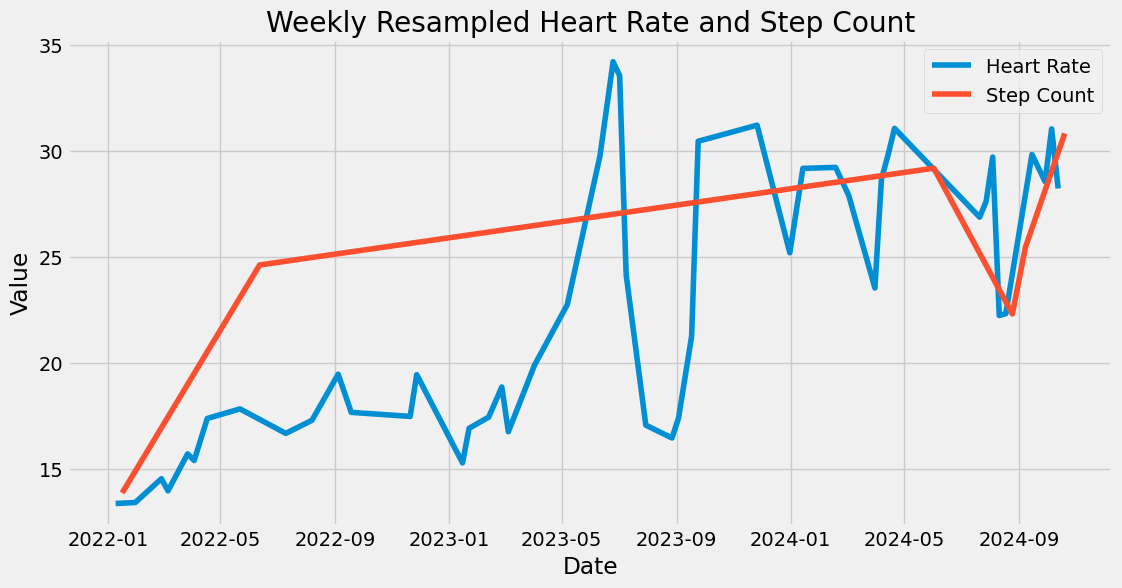

In [5]:
# Convert 'value' column to numeric, coercing errors to NaN
record_data['value'] = pd.to_numeric(record_data['value'], errors='coerce')

record_data_watch = record_data[(record_data['sourceName'] != "Carter's iPhone") & (record_data['creationDate'].dt.year >= 2022)]

# Resample the data by week using the 'creationDate' column and calculate the mean
record_data_resampled = record_data_watch.resample('1W', on='creationDate').agg({
    'value': 'mean',
    'type': 'first',  # Keep the first occurrence of 'type' in each resampled period
    'startDate': 'first',
    'endDate': 'first'
})

# Filter the resampled data for heart rate and step count
heart_rate_data = record_data_resampled[record_data_resampled['type'] == 'HeartRate']
step_count_data = record_data_resampled[record_data_resampled['type'] == 'StepCount']

# Plot the heart rate data
plt.figure(figsize=(12, 6))
plt.plot(heart_rate_data.index, heart_rate_data['value'], label='Heart Rate')

# Optionally, plot the step count data
plt.plot(step_count_data.index, step_count_data['value'], label='Step Count')

# Add labels and legend
plt.title('Weekly Resampled Heart Rate and Step Count')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [6]:
# generate insights with heartrate


value = 4 - 1
record_data[record_data['type'] == 'AppleSleepingWristTemperature'].sample(value)

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
2405498,AppleSleepingWristTemperature,Carter’s Apple Watch,11.0,degF,2024-07-11 11:33:02-07:00,2024-07-11 01:38:15-07:00,2024-07-11 11:33:00-07:00,95.6558,"<<HKDevice: 0x302f6b4d0>, name:Apple Watch, ma..."
2405538,AppleSleepingWristTemperature,Carter’s Apple Watch,11.0,degF,2024-08-31 08:58:30-07:00,2024-08-30 23:36:31-07:00,2024-08-31 08:58:29-07:00,96.6744,"<<HKDevice: 0x302f00eb0>, name:Apple Watch, ma..."
2405458,AppleSleepingWristTemperature,Carter’s Apple Watch,10.5,degF,2024-05-22 09:32:33-07:00,2024-05-21 23:38:09-07:00,2024-05-22 09:32:33-07:00,95.8970,"<<HKDevice: 0x302f6ae40>, name:Apple Watch, ma..."


ValueError: x and y must be the same size

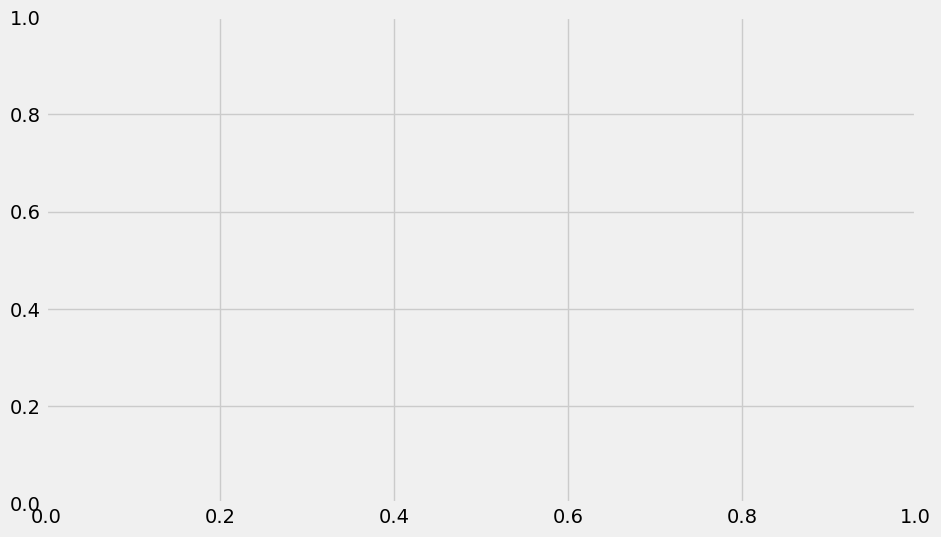

In [7]:

sleep_data = pd.DataFrame()
sleep_data["sleep_temperature"] = record_data[record_data["type"] == "AppleSleepingWristTemperature"]['value']
sleep_data["heart_rate"] = record_data[record_data["type"] == "HeartRate"]['value']

# Plot sleep temperature vs. heart rate
plt.figure(figsize=(10, 6))
plt.scatter(record_data[record_data["type"]=="AppleSleepingWristTemperature"]['value'], record_data[record_data["type"]=="HeartRate"]['value'], alpha=0.5)
plt.title('Sleep Temperature vs. Heart Rate')
plt.xlabel('Sleep Temperature (°C)')
plt.ylabel('Heart Rate (bpm)')
plt.show()

# Calculate correlation
correlation = sleep_data['sleep_temperature'].corr(sleep_data['heart_rate'])
print(f"Correlation between sleep temperature and heart rate: {correlation:.2f}")